<a href="https://colab.research.google.com/github/AndyHoskins87/PyTorch_DeepLearning/blob/main/02_PyTorch_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Classification

Classification problems involve predicting weather something is one thing or another.

* `Binary Classification` - Target can be one of two options (eg. yes or no).
* `Multi-Class Classification` - Target can be more than two options (eg, is it food, a person or cat).
* `Multi-label Classification` - Target can be assigned more than one option. (Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy).)

## Classification Data

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f" Five samples of X:\n {X[:5]}")
print(f" Five samples of y:\n {y[:5]}")

 Five samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
 Five samples of y:
 [1 1 1 1 0]


In [ ]:
# Make a Dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"x1": X[:, 0],
                        "x2": X[:, 1],
                        "label": y})
circles.head(10)

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
# Check different labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

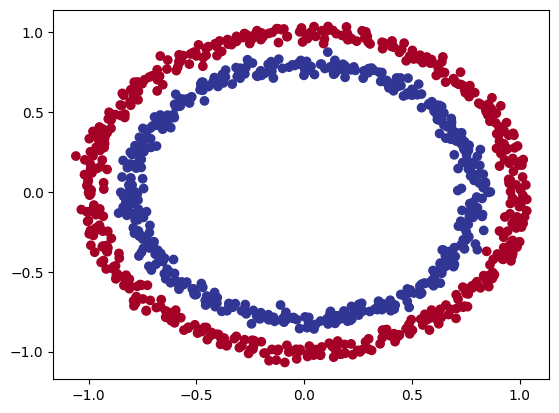

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

## Turn Data into Tensors

In [ ]:
# Turn Data into Tensors from NumPy
import torch
X = torch.from_numpy(X).type(torch.float32) #Default type float 32
y = torch.from_numpy(y).type(torch.float32)


## Train, Test Splits

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)

## Build a Model

* Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
* Constructing a model by subclassing nn.Module.
* Define a loss function and optimizer.
* Creating a training loop

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train.shape

torch.Size([800, 2])

* Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).
* Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
* Defines a `forward()` method containing the forward pass computation of the model.
* Instantiates the model class and sends it to the target device.

In [ ]:
from sklearn import datasets
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 ->  layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0581,  0.4001],
                      [-0.4867, -0.5224],
                      [ 0.4556,  0.5530],
                      [ 0.5041, -0.6170],
                      [ 0.4118, -0.4579]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.6656,  0.5972,  0.2876, -0.6106, -0.1212], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0445, -0.0041,  0.1101, -0.1660,  0.2091]], device='cuda:0')),
             ('1.bias', tensor([-0.2393], device='cuda:0'))])

In [ ]:
# Make predictions with the model
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.0662],
        [-0.0196],
        [-0.1722],
        [-0.0362],
        [-0.1466],
        [-0.1183],
        [-0.0074],
        [-0.0305],
        [-0.1732],
        [-0.0162]], device='cuda:0')

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Set up Loss Function and Optimiser

In [ ]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built in. BCELoss = requires input to have gone through the sigmoid activation function first.

# Create an optimiser
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## Train a Model

### Going from raw Logits -> Prediction probabilites -> Predictions Labels.

Our model outputs are going to be raw logits.

We can convert these **logits** into prediction probabilites by passing them to some kind of activation function;
* `sigmoid for binary classification`
* `softmax for multi-class classification`

Then we can convert our models predictions probabilities to labels by either rounding them or taking the `argmax()`

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0662],
        [-0.0196],
        [-0.1722],
        [-0.0362],
        [-0.1466]], device='cuda:0')

In [ ]:
# Use the sigmoid activation function to turn them into prediction probabilites.
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4835],
        [0.4951],
        [0.4570],
        [0.4909],
        [0.4634]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them.
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)


In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [ ]:
X_test.squeeze().shape, y_logits.squeeze().shape

(torch.Size([200, 2]), torch.Size([5]))

## Building a Training and Test Loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69450, Acc: 48.88% | Test loss: 0.69724, Test acc: 45.00%
Epoch: 10 | Loss: 0.69351, Acc: 47.50% | Test loss: 0.69641, Test acc: 46.00%
Epoch: 20 | Loss: 0.69321, Acc: 49.75% | Test loss: 0.69608, Test acc: 46.00%
Epoch: 30 | Loss: 0.69310, Acc: 50.12% | Test loss: 0.69589, Test acc: 46.00%
Epoch: 40 | Loss: 0.69306, Acc: 50.88% | Test loss: 0.69574, Test acc: 45.50%
Epoch: 50 | Loss: 0.69304, Acc: 51.12% | Test loss: 0.69561, Test acc: 45.00%
Epoch: 60 | Loss: 0.69302, Acc: 51.38% | Test loss: 0.69549, Test acc: 45.50%
Epoch: 70 | Loss: 0.69301, Acc: 51.62% | Test loss: 0.69539, Test acc: 46.00%
Epoch: 80 | Loss: 0.69300, Acc: 51.12% | Test loss: 0.69530, Test acc: 46.00%
Epoch: 90 | Loss: 0.69300, Acc: 51.12% | Test loss: 0.69522, Test acc: 46.00%


## Make Predictions & Evaluate the model.

In [ ]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

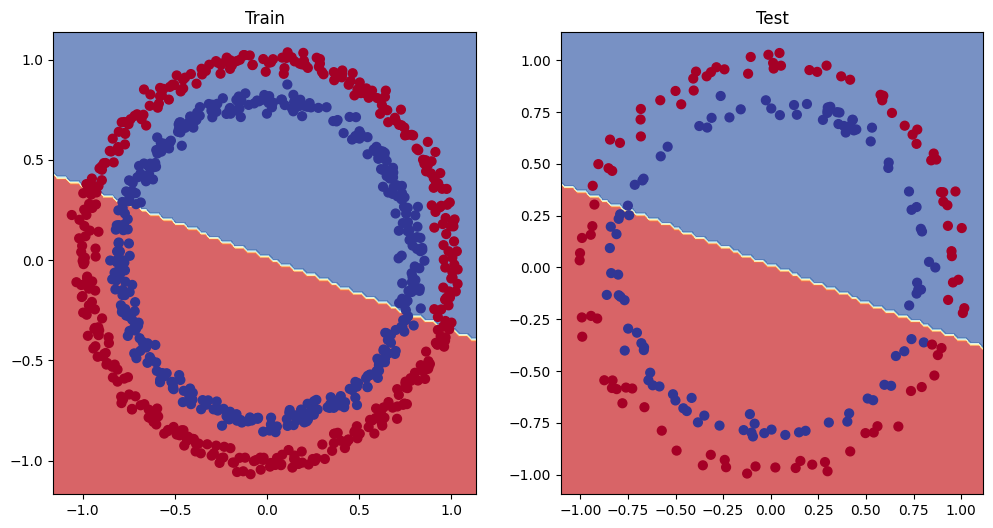

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)
